# Download Multiple .nc Files

In [1]:
# Download Files to relative folder  
from hypso import download_nc_files
            
download_nc_files(filename_list=["tibet_2022-09-29_0446Z.nc", "xaafuun_2023-09-11_0623Z-l1a.nc","vancouver_2023-05-25_1831Z-l1a.nc"],
                  output_dir="downl_dir")

Downloading: tibet_2022-09-29_0446Z.nc [=================================] 100%
Downloading: xaafuun_2023-09-11_0623Z-l1a.nc [===========================] 100%
Downloading: vancouver_2023-05-25_1831Z-l1a.nc [=========================] 100%


# Read .nc File

In [1]:
# Import Satellite Object
from hypso import Satellite

# Define HYPSO Image File and the .points from QGIS (if available)
hypso_file_path="/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1a.nc"
points_path = "/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-rgba_8bit.tif.points"

# Create Satellite Object
satobj = Satellite(hypso_file_path, points_path)

Processing *wide* Image with Dimensions: (598, 1092)
Time Unixtime Already Exists NetCDF: String match to name in use
Sensor Z Already Exists NetCDF: String match to name in use
Sensor A Already Exists NetCDF: String match to name in use
Solar Z Already Exists NetCDF: String match to name in use
Solar A Already Exists NetCDF: String match to name in use
Latitude Already Exists NetCDF: String match to name in use
Longitude Already Exists NetCDF: String match to name in use
Radiometric Correction Ongoing
Smile Correction Ongoing
Destriping Correction Ongoing
RGBA Tif File:  mjosa_2023-06-15_0948Z-l1a-rgba_8bit.tif


# Generate L1C Geotiff Product

Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [59.30696, 62.524284, 8.8205805, 11.828691]
    using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
    Area covered by image: 28628943217.804348 m^2 = 28628.943217804346 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1284864 / 2517394
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 11
      Starting band 61
      Starting band 50
      Starting band 31
      Done with band 11      Done with band 50
      Done with band 61
      Done with band 31

Done RGB/RGBA Geotiff
RGBA Tif File:  mjosa_2023-06-15_0948Z-l1a-rgba_8bit.tif
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505     

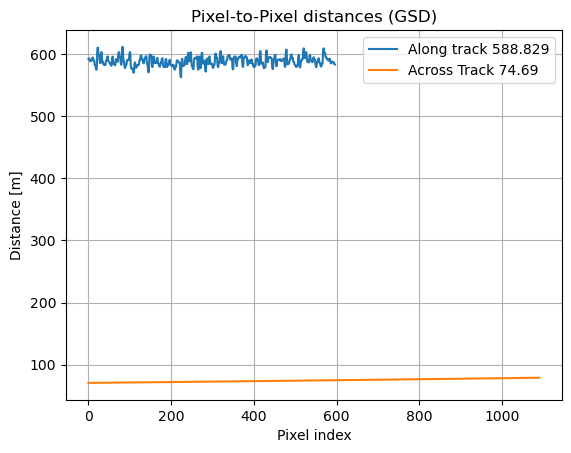

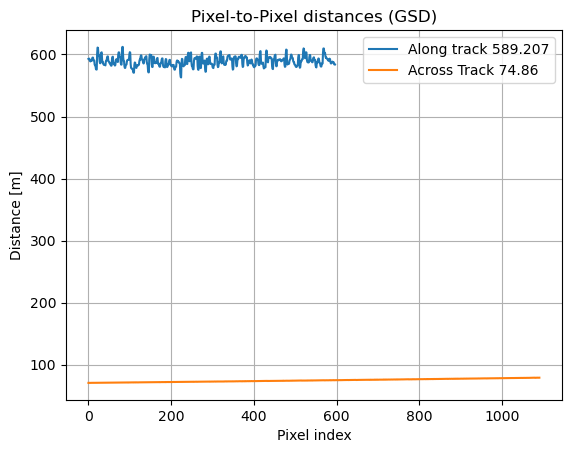

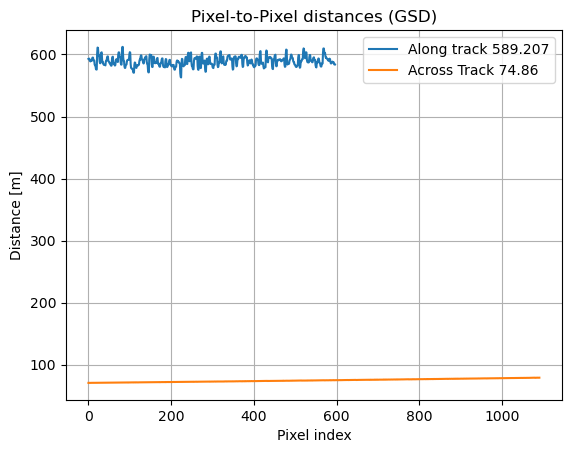

In [3]:
# Get Product
satobj.get_geotiff(product="L1C", force_reload=True)

# Get Radiance from L1C Product

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (59.5, 10) -→ (1883, 77)


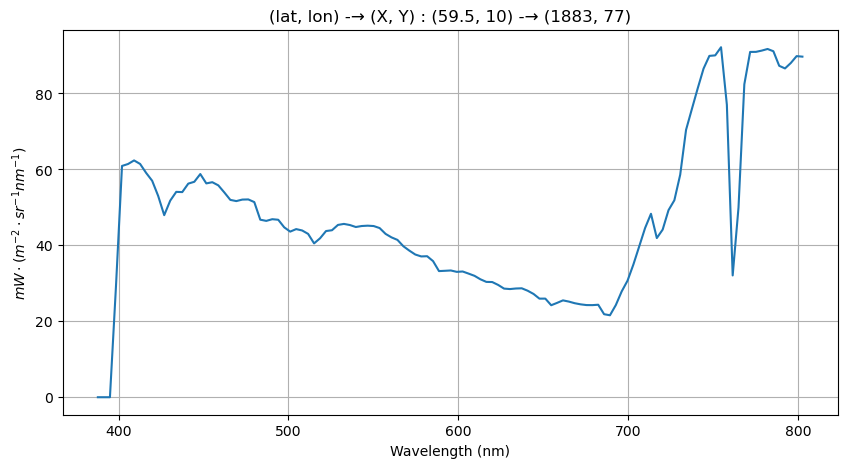

wl   radiance   lat  lon     X   Y
0  387.847497   0.000000  59.5   10  1883  77
1  391.404066   0.000000  59.5   10  1883  77
2  394.959416   0.000000  59.5   10  1883  77
3  398.513546  29.226183  59.5   10  1883  77
4  402.066457  60.909856  59.5   10  1883  77

In [4]:
spectra_l1c = satobj.get_spectra(product="L1C",
                              position_dict={"lat":59.5,"lon":10},
                              postype="coord", plot=True)

spectra_l1c.head()

# Create L2 Geotiff Product

In [3]:
atmos_params = {
    'model': "6SV1",
    'aot550': 0.0580000256
}

# Get Spectra with Py6S AOT550 param gotten from: https://giovanni.gsfc.nasa.gov/giovanni/
# In this case, if you force reload, you would delete L1C so we set it to False
satobj.get_geotiff(product="L2", force_reload=False, atmos_dict=atmos_params)

RGBA Tif File:  mjosa_2023-06-15_0948Z-l1a-rgba_8bit.tif
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505           59.756197
4            10.380956           59.959049
5             9.654835            60.01048
6            10.005274           60.607818
7            10.727707           60.802114
8            10.400754           60.904713
9            10.429935           60.964835
10           10.153709           61.127709
11           11.523019           62.191321
12           11.633964           62.255133
13           11.427097           62.254831
Hypso Destination
     transformed_mapLon  transformed_mapLat
0            10.366577           59.716311
1            10.241021           59.569467
2            10.386577           59.438368
3            10.595467           59.6689

KeyboardInterrupt: 

# Get Rrs from L2 Product

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (59.5, 10) -→ (1883, 77)


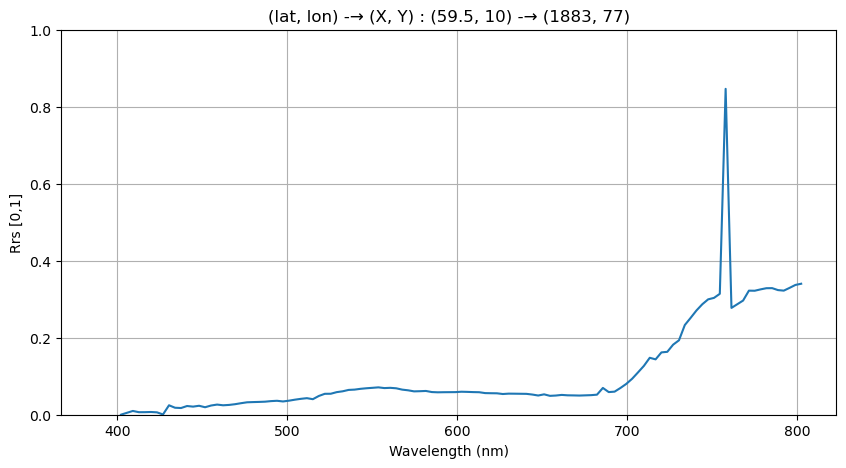

wl       rrs   lat  lon     X   Y
0  387.847497 -0.286120  59.5   10  1883  77
1  391.404066 -0.267847  59.5   10  1883  77
2  394.959416 -0.258091  59.5   10  1883  77
3  398.513546 -0.122010  59.5   10  1883  77
4  402.066457  0.000007  59.5   10  1883  77

In [3]:
spectra_l2 = satobj.get_spectra(product="L2",
                              position_dict={"lat":59.5,"lon":10},
                              postype="coord", plot=True) # Mjosa Sandvika

spectra_l2.head()

# Overlay RGB on Map

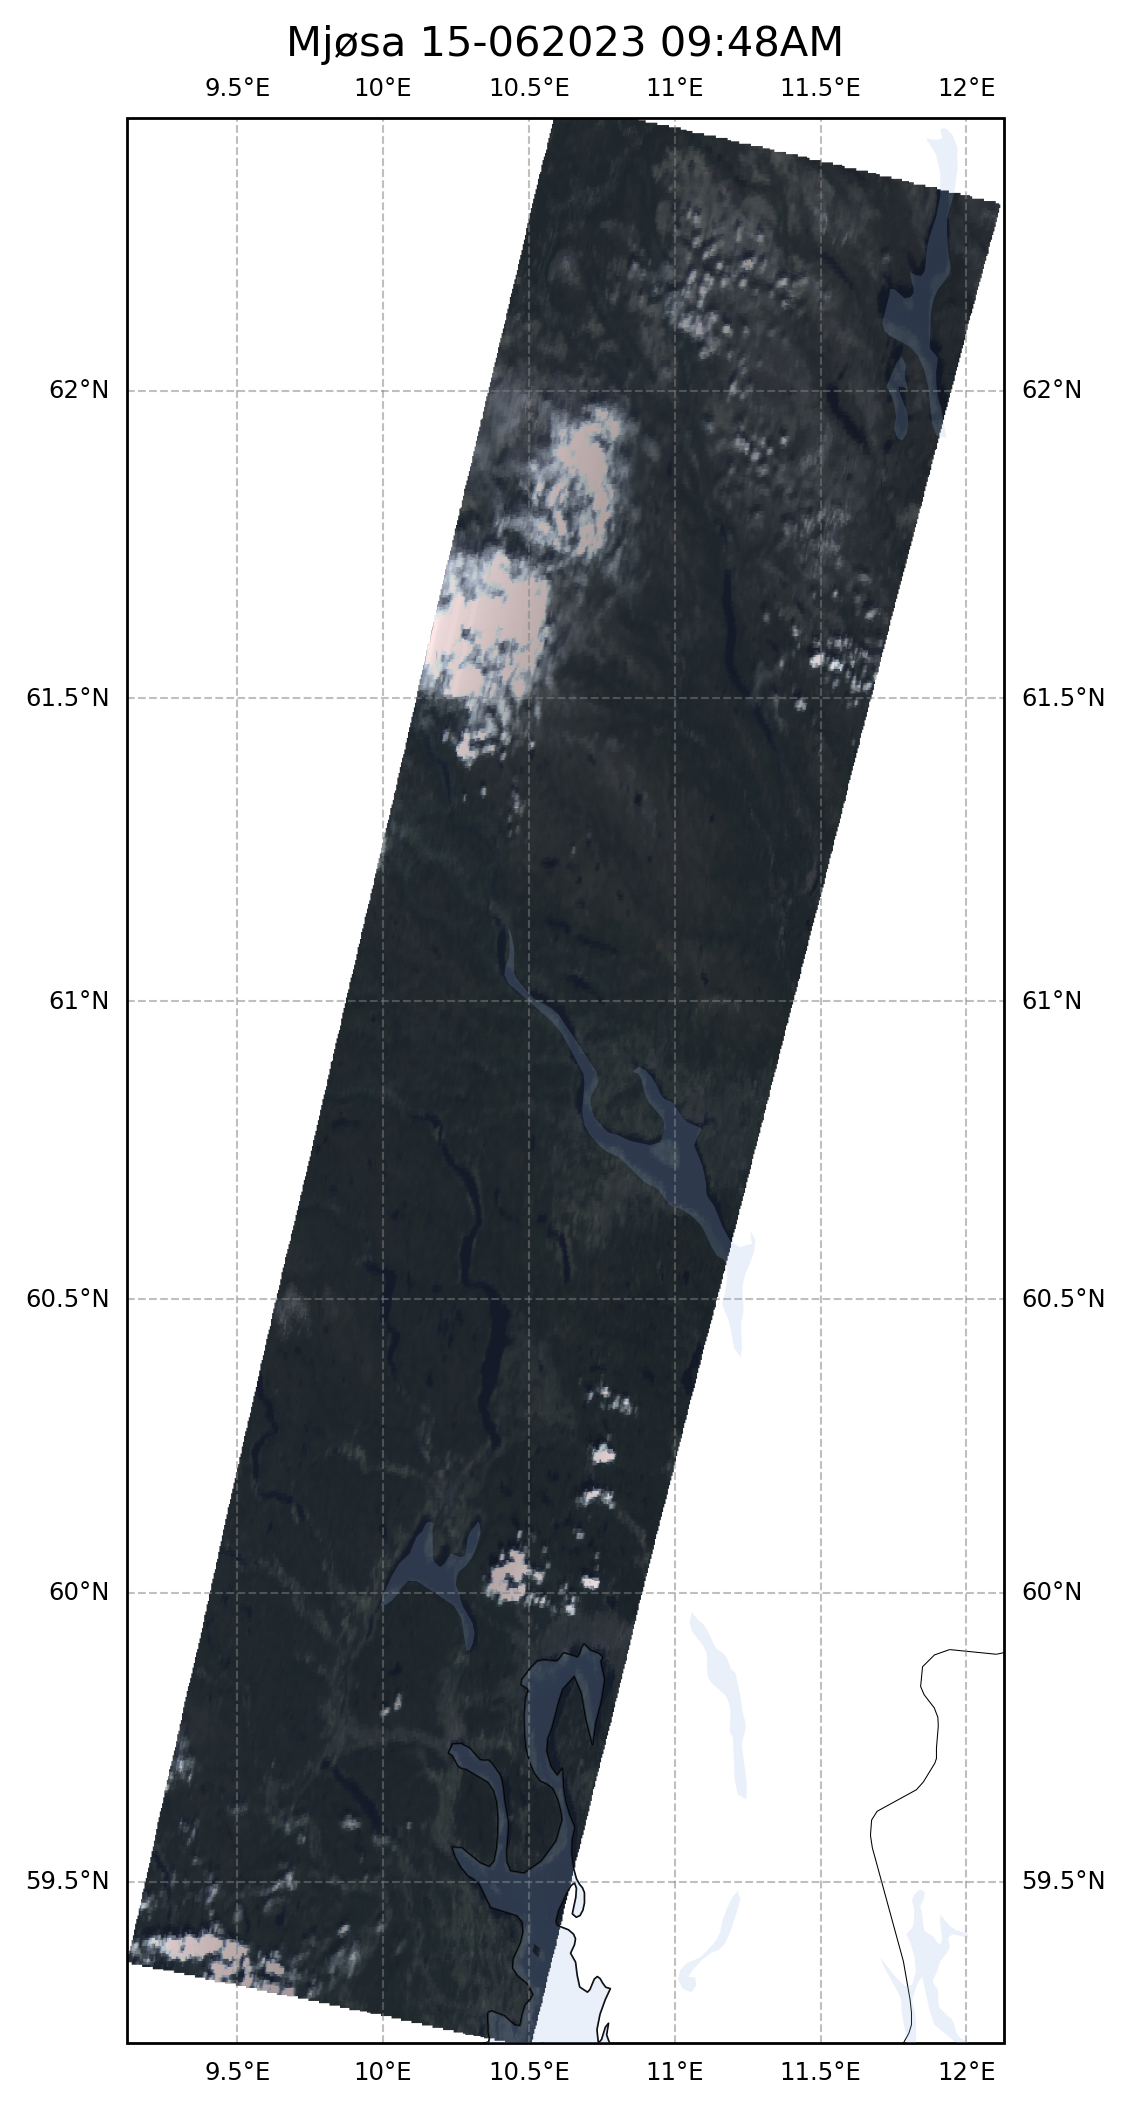

In [4]:
# Import Functions
from hypso.plot import show_rgb_map

# Show Map
show_rgb_map(satobj, plotTitle="Mjøsa 15-062023 09:48AM",dpi_input=250)

## Draw Points/Marks on Map

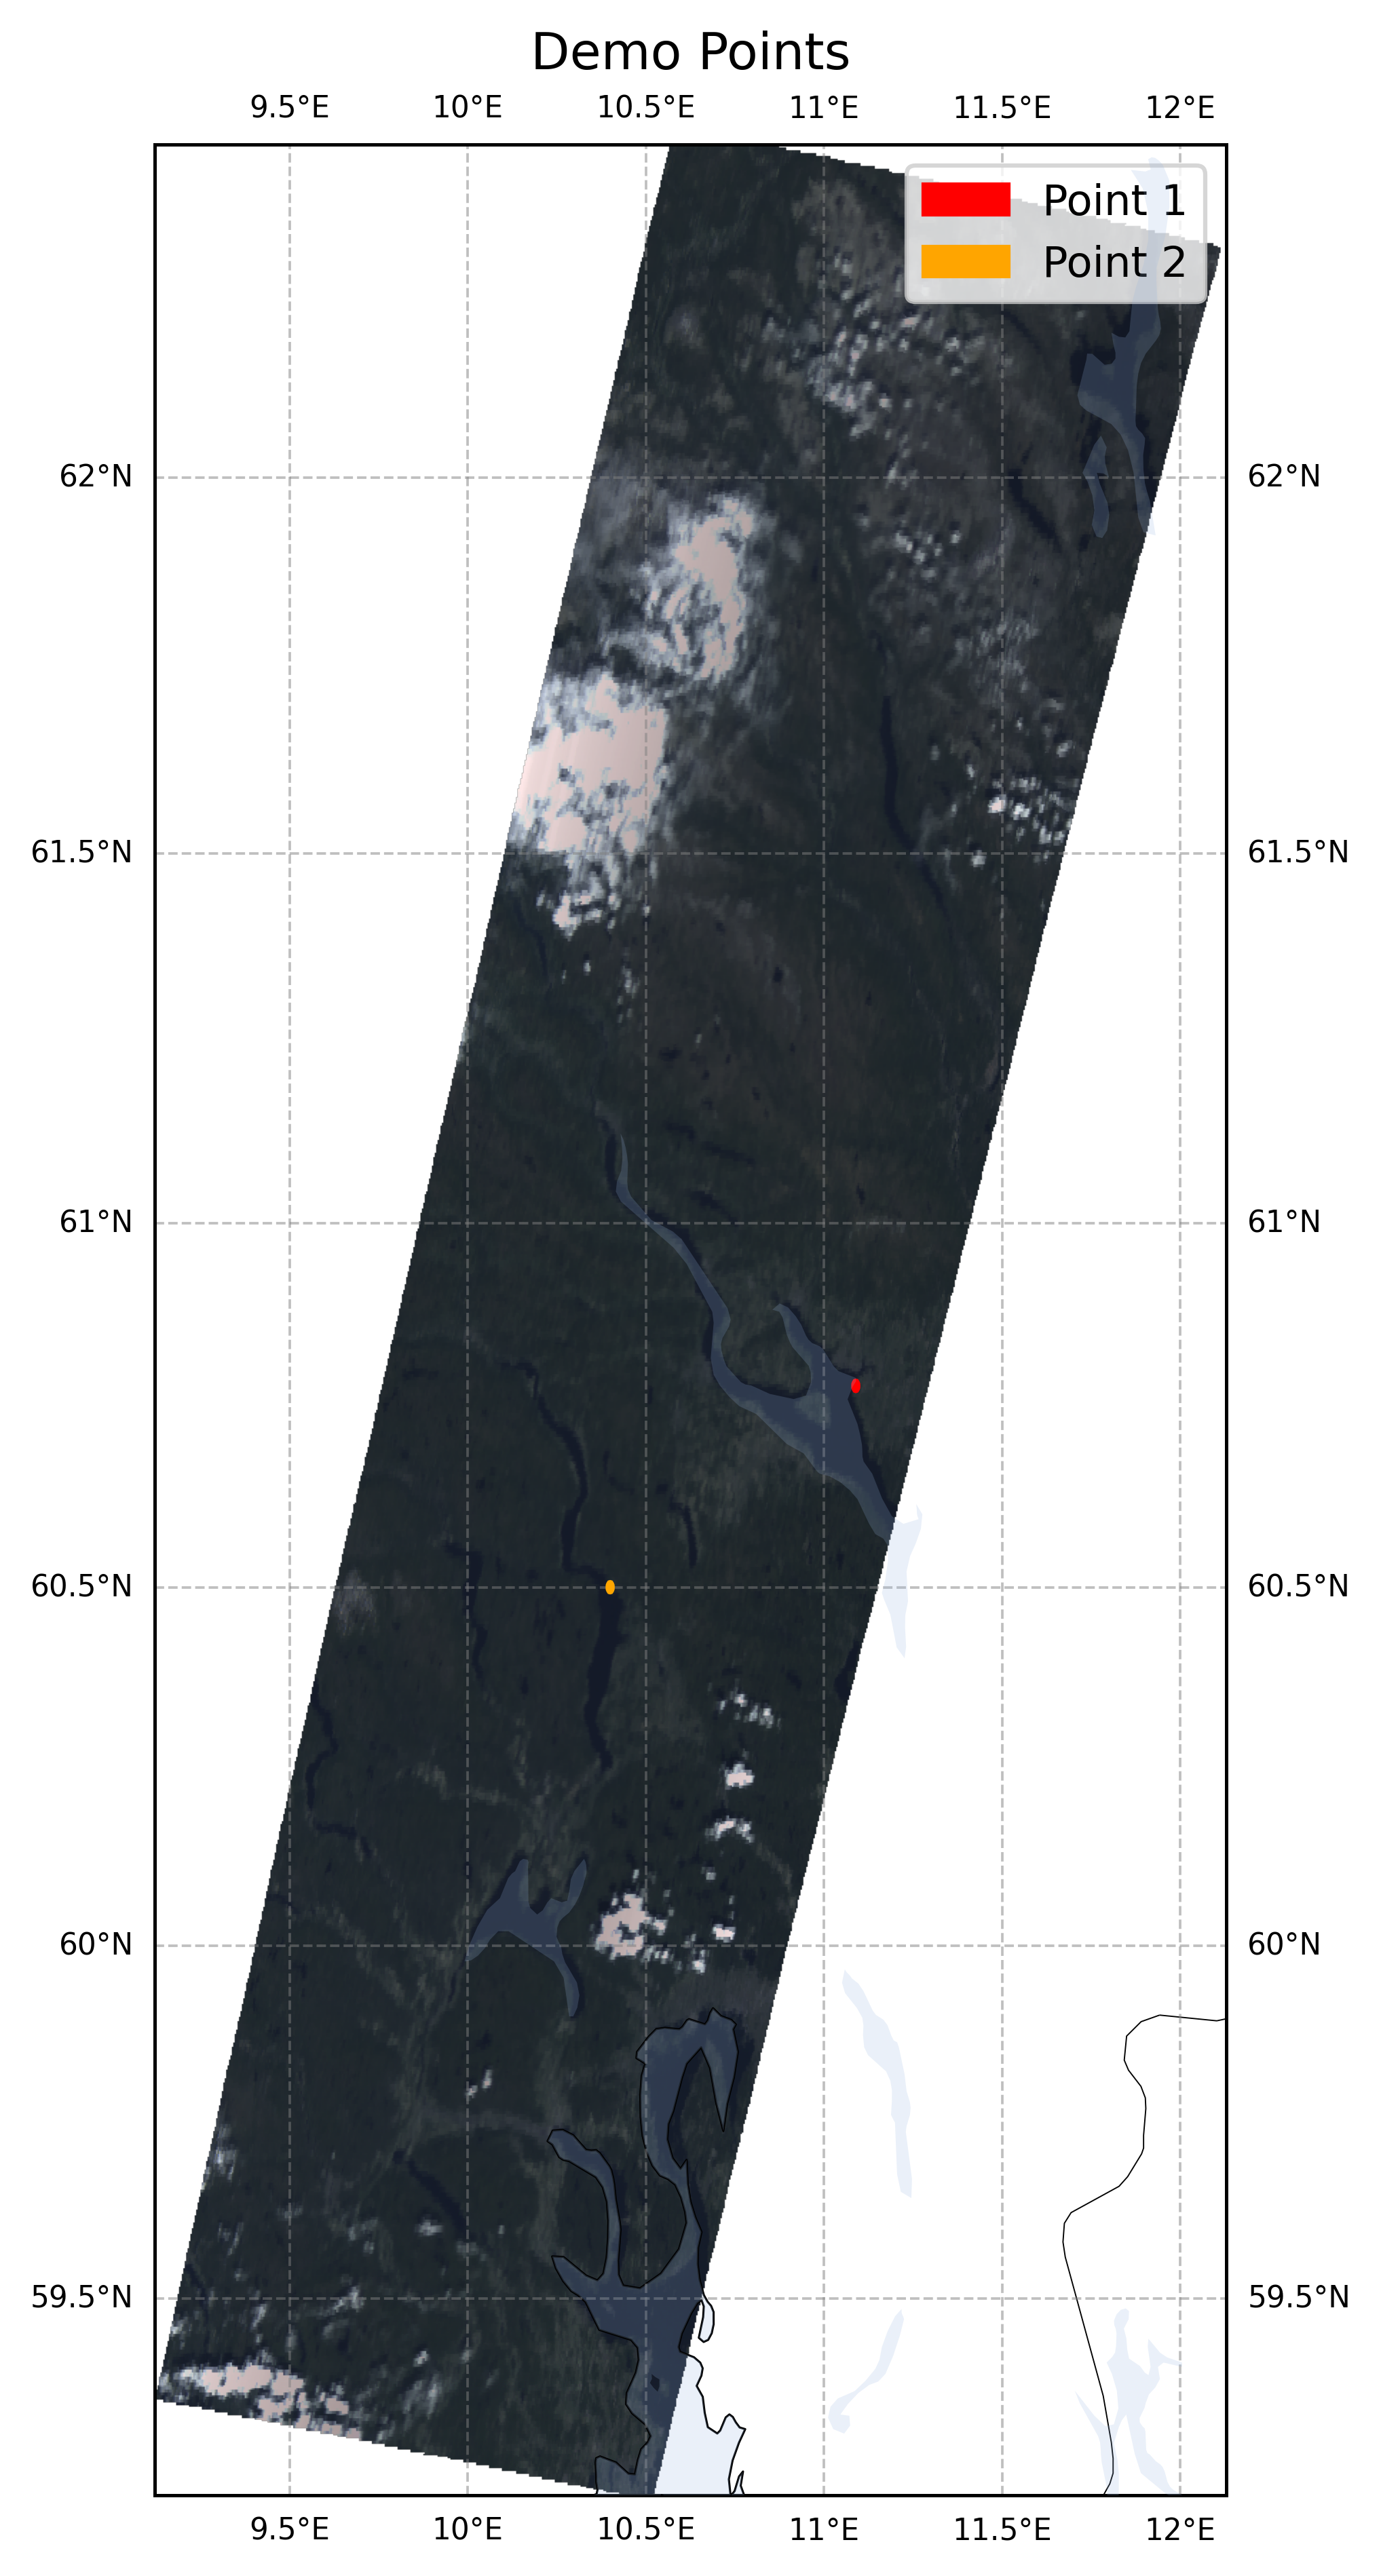

In [8]:
from hypso.plot import point_rgb_map

points_dict={
    "Point 1":{
        "lat":60.7776,
        "lon":11.0895,
        "color":"red"
    },
    "Point 2":{
        "lat":60.5,
        "lon":10.4,
        "color":"orange"
    }
}
point_rgb_map(satobj,patch_dict=points_dict,r_plot=0.007,plotTitle=f"Demo Points",path_to_save=None)


## Plot 2D Array on Map

2D Array Plot Range:  [0.01, 100]


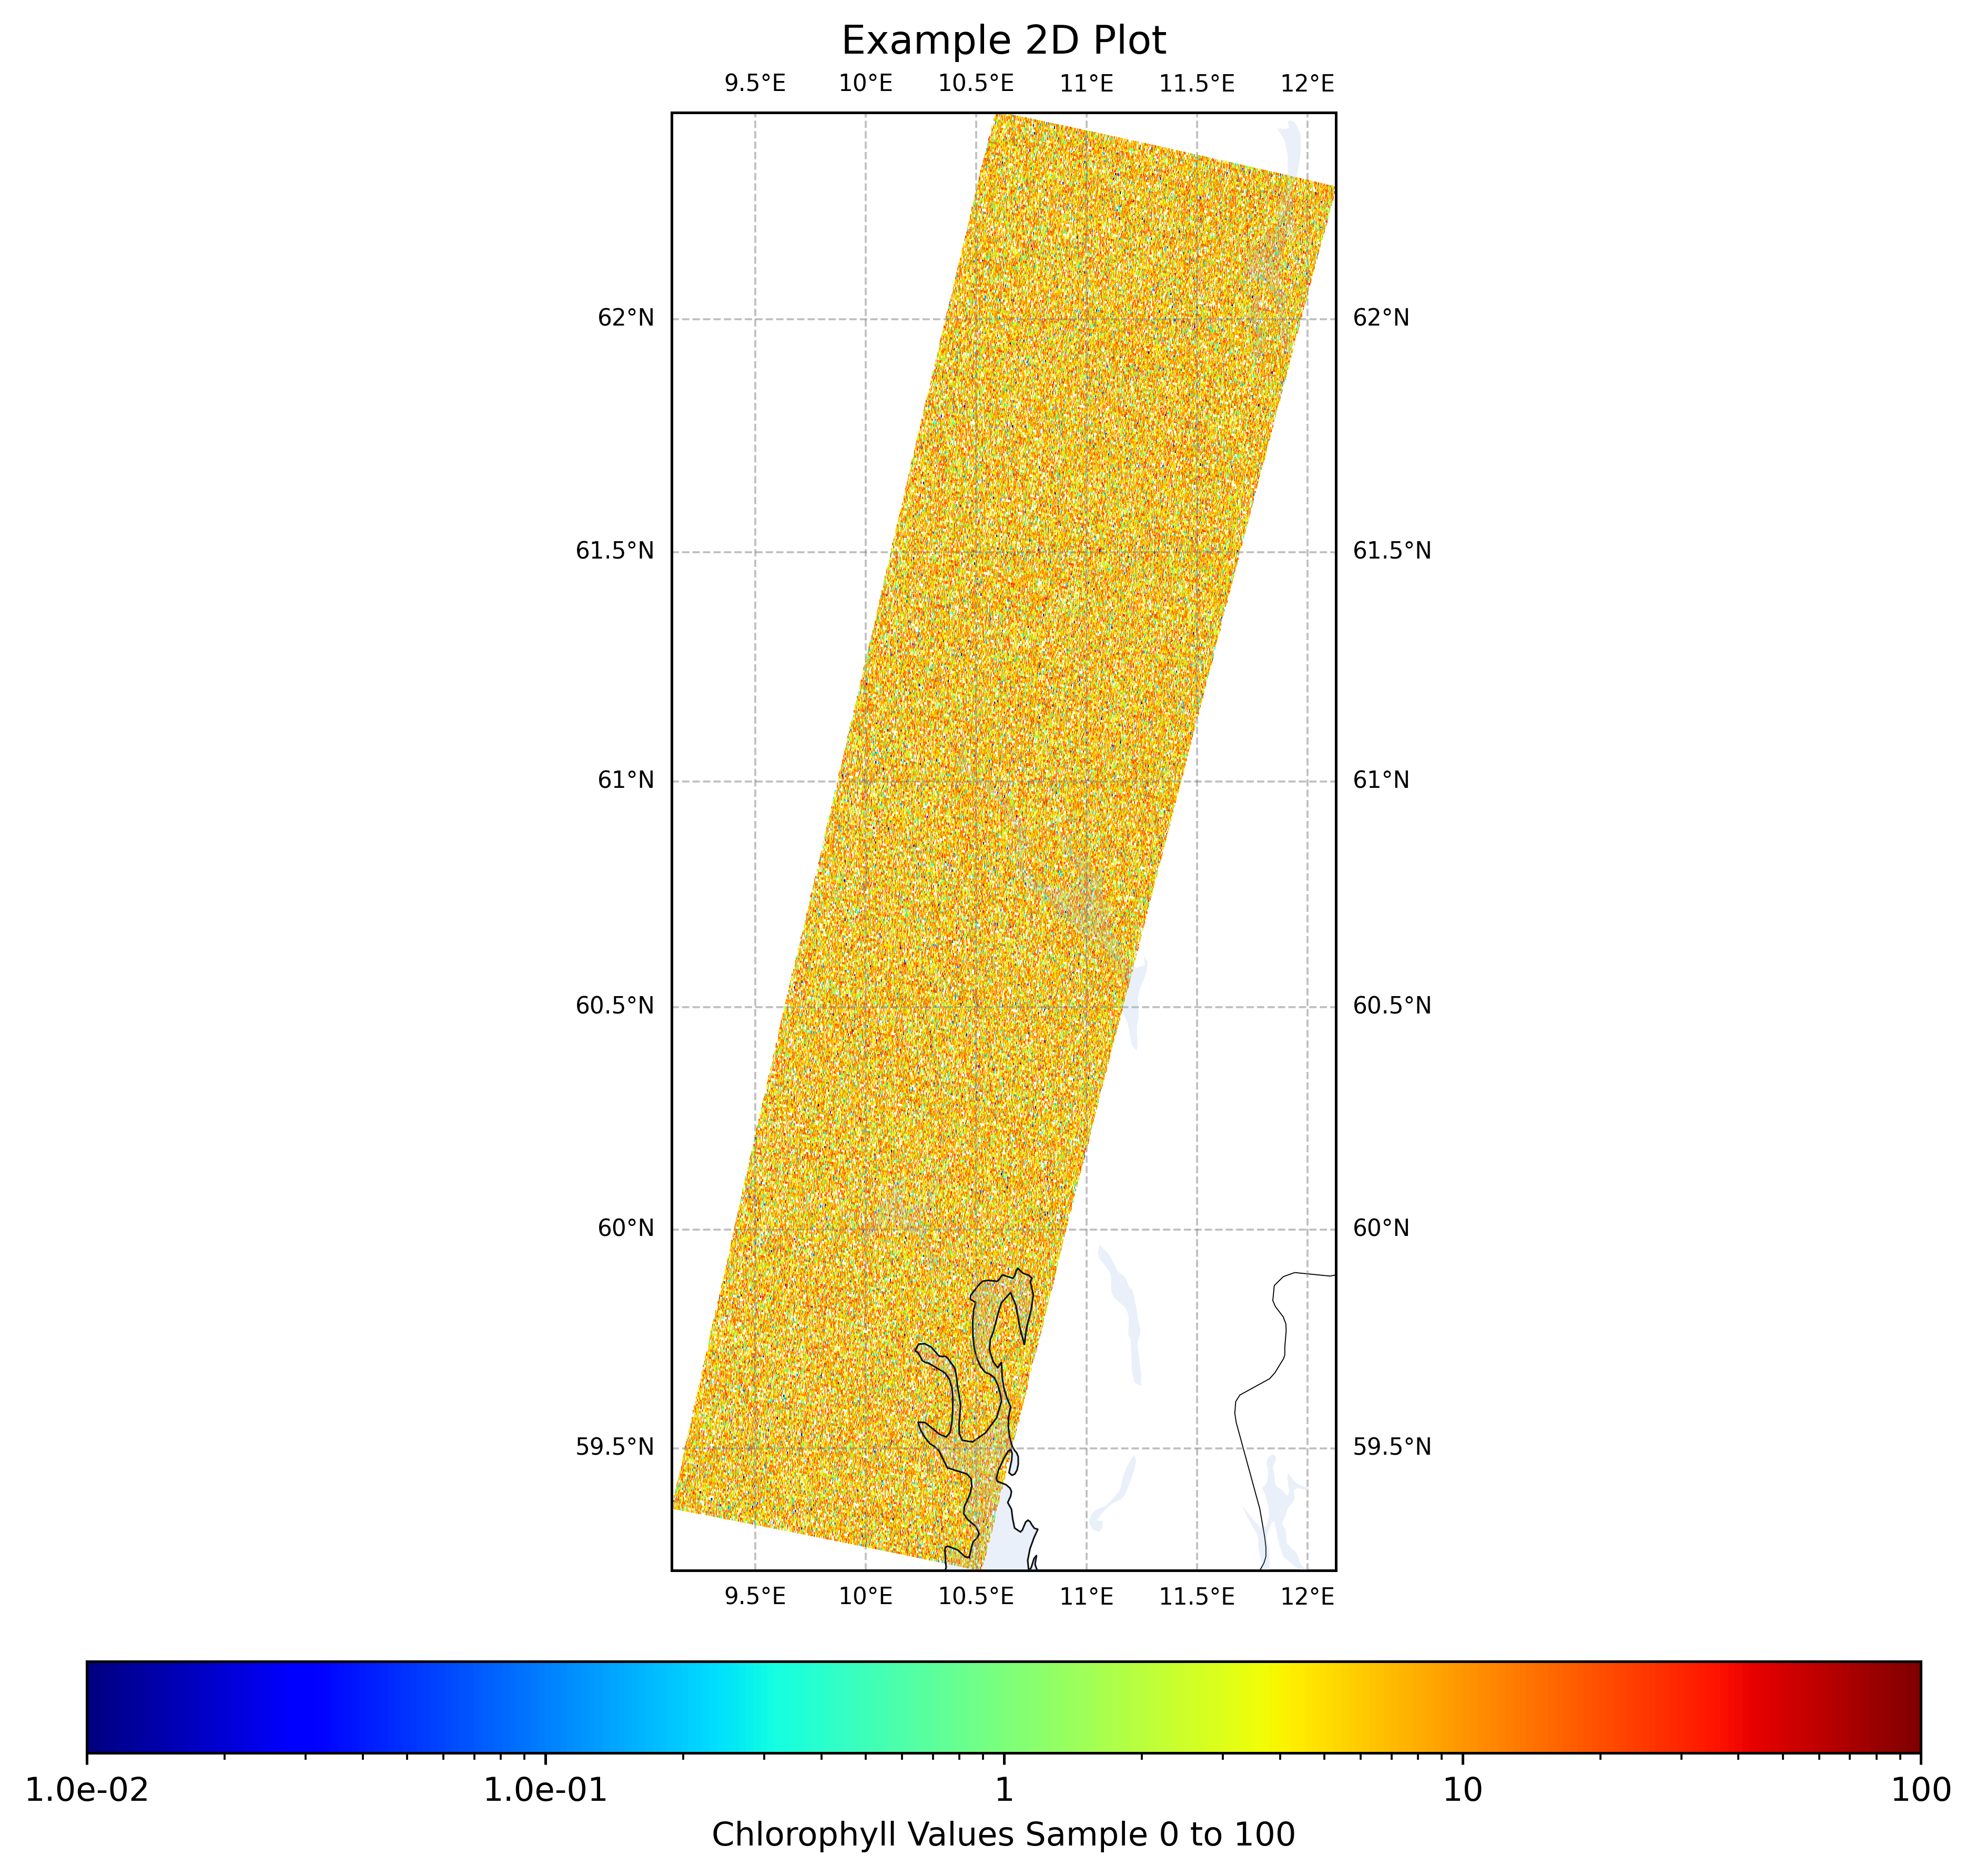

In [9]:
# Create Random Array of Chlorophyll Values
import numpy as np
chl_array = np.random.normal(1, 10, size=satobj.spatialDim)


from hypso.plot import plot_array_overlay
# Plot Array on Map
plot_array_overlay(satobj,chl_array, plotTitle="Example 2D Plot",cbar_title="Chlorophyll Values Sample 0 to 100", min_value=0.01,max_value=100)

## Export RGB to .png

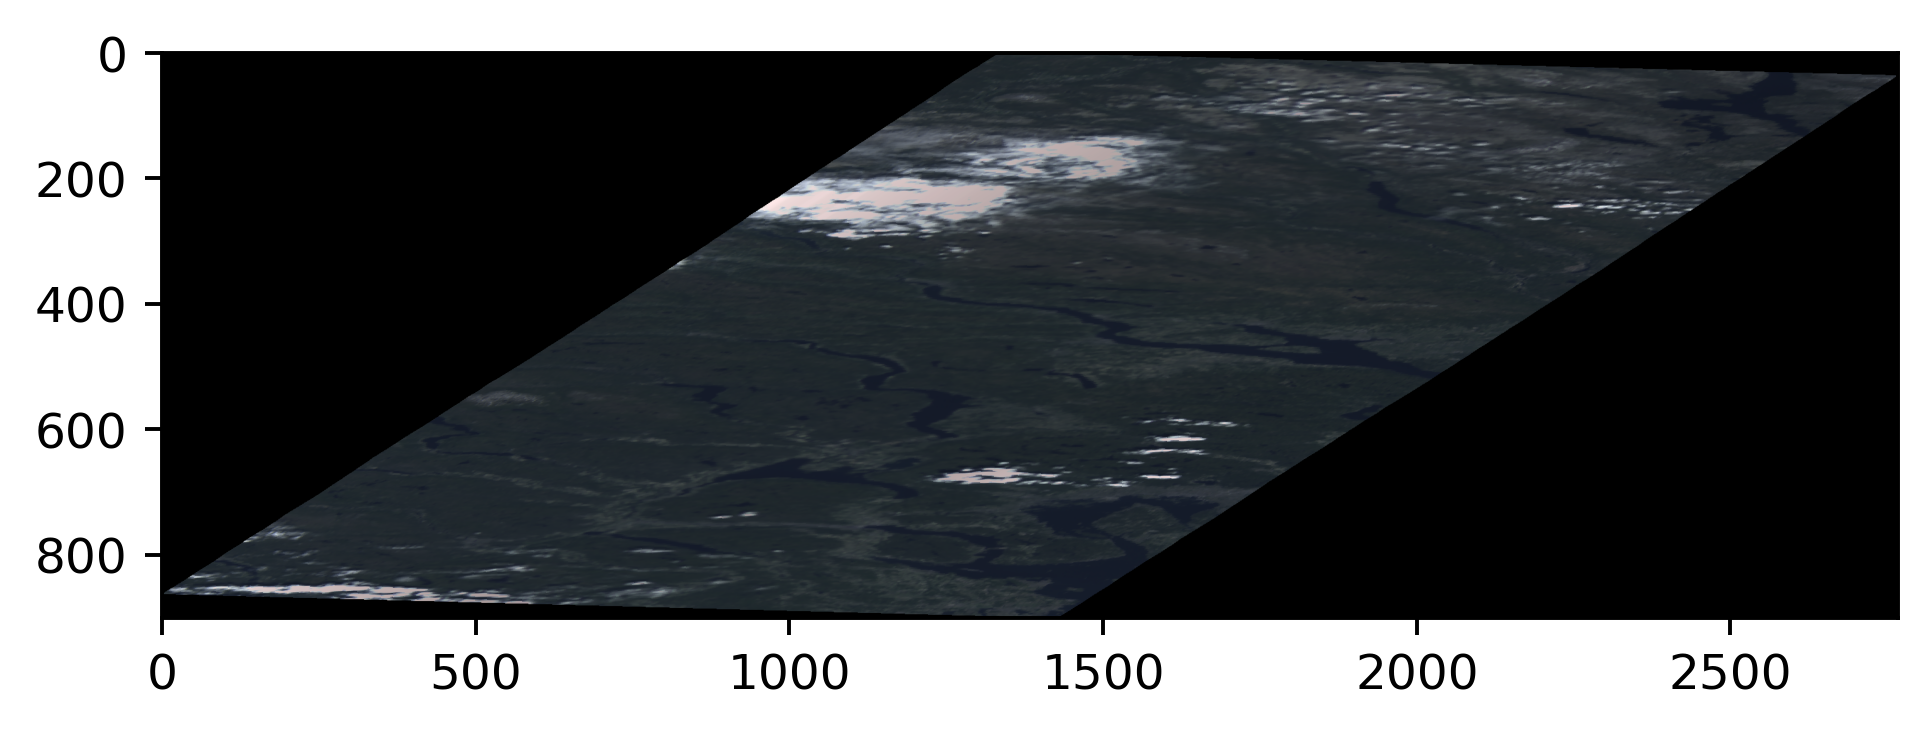

In [10]:
from hypso.plot import write_rgb_to_png

# Export Georeferenced RGB to png
write_rgb_to_png(satobj,path_to_save=r"/Users/alvaroflores/Desktop/image_demo.png")

## Estimate Water Mask



-------  Naive-Bayes Water Mask Detector  ----------
Loading configuration file /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini
File /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini verified.
[['ndwi', 'Nir'], ['otsu', 'ndwi']]
maxndwi
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=15310.076816198272
k=3 :Calinski_harabaz index=9439.605020662584
k=4 :Calinski_harabaz index=21730.37652977176
k=5 :Calinski_harabaz index=18132.98113250574
k=6 :Calinski_harabaz index=19742.593376345652
k=7 :Calinski_harabaz index=24118.322828679957
Applying clusters based naive bayes classifier
Assgnin 1 to cluster_id 5
Skipping cluster_id 5


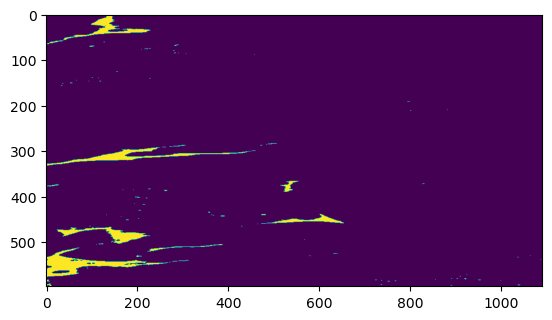

In [11]:
from hypso.classification import ndwi_watermask

# Calculate Water Mask With Binary Values
ndwi_watermask(satobj)

# Show Water Mask
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(satobj.waterMask)
plt.show()

## Print Contents of .nc file

In [5]:
from hypso.utils import print_nc

hypso_file_path="/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1a.nc"
hypso_file_path=r"/Users/alvaroflores/Desktop/caca.nc/HYPSO1_2023_06_15_09_48_51_L2R.nc"
# Print Attributes and Groups of .nc file generated
print_nc(hypso_file_path)

# import netCDF4 as nc
# with nc.Dataset(hypso_file_path, format="NETCDF4") as f:
#     group = f
#     for var in f.variables.keys():
#         print(var)
    # timestamps_services = group.variables["timestamps_srv"][:]
    # timestamps = group.variables["timestamps"][:]
import netCDF4 as nc
with nc.Dataset(hypso_file_path, format="NETCDF4") as f:
    group = f
    keys = [i for i in f.variables.keys()]
    try:
        keys.remove('lat')
        keys.remove('lon')
    except:
        print("Couldn't find lat and lon keys on Acolite .nc")

    toa_keys = [k for k in keys if 'rhot' in k]
    surface_keys = [kk for kk in keys if 'rhos' in kk]

--- GROUP: "/" ---
DIMENSIONS: x, y, 
VARIABLES: lon, lat, rhot_388, rhos_388, rhot_391, rhos_391, rhot_395, rhos_395, rhot_399, rhos_399, rhot_402, rhos_402, rhot_406, rhos_406, rhot_409, rhos_409, rhot_413, rhos_413, rhot_416, rhos_416, rhot_420, rhos_420, rhot_423, rhos_423, rhot_427, rhos_427, rhot_430, rhos_430, rhot_434, rhos_434, rhot_438, rhos_438, rhot_441, rhos_441, rhot_445, rhos_445, rhot_448, rhos_448, rhot_452, rhos_452, rhot_455, rhos_455, rhot_459, rhos_459, rhot_462, rhos_462, rhot_466, rhos_466, rhot_469, rhos_469, rhot_473, rhos_473, rhot_476, rhos_476, rhot_480, rhos_480, rhot_483, rhos_483, rhot_487, rhos_487, rhot_490, rhos_490, rhot_494, rhos_494, rhot_498, rhos_498, rhot_501, rhos_501, rhot_505, rhos_505, rhot_508, rhos_508, rhot_512, rhos_512, rhot_515, rhos_515, rhot_519, rhos_519, rhot_522, rhos_522, rhot_526, rhos_526, rhot_529, rhos_529, rhot_533, rhos_533, rhot_536, rhos_536, rhot_540, rhos_540, rhot_543, rhos_543, rhot_547, rhos_547, rhot_550, rhos_550, r

In [5]:
print(toa_keys)
print(surface_keys)

['rhot_388', 'rhot_391', 'rhot_395', 'rhot_399', 'rhot_402', 'rhot_406', 'rhot_409', 'rhot_413', 'rhot_416', 'rhot_420', 'rhot_423', 'rhot_427', 'rhot_430', 'rhot_434', 'rhot_438', 'rhot_441', 'rhot_445', 'rhot_448', 'rhot_452', 'rhot_455', 'rhot_459', 'rhot_462', 'rhot_466', 'rhot_469', 'rhot_473', 'rhot_476', 'rhot_480', 'rhot_483', 'rhot_487', 'rhot_490', 'rhot_494', 'rhot_498', 'rhot_501', 'rhot_505', 'rhot_508', 'rhot_512', 'rhot_515', 'rhot_519', 'rhot_522', 'rhot_526', 'rhot_529', 'rhot_533', 'rhot_536', 'rhot_540', 'rhot_543', 'rhot_547', 'rhot_550', 'rhot_554', 'rhot_557', 'rhot_561', 'rhot_564', 'rhot_568', 'rhot_571', 'rhot_575', 'rhot_578', 'rhot_582', 'rhot_585', 'rhot_589', 'rhot_592', 'rhot_596', 'rhot_599', 'rhot_603', 'rhot_606', 'rhot_610', 'rhot_613', 'rhot_616', 'rhot_620', 'rhot_623', 'rhot_627', 'rhot_630', 'rhot_634', 'rhot_637', 'rhot_641', 'rhot_644', 'rhot_648', 'rhot_651', 'rhot_655', 'rhot_658', 'rhot_662', 'rhot_665', 'rhot_668', 'rhot_672', 'rhot_675', 'rh

In [7]:
import netCDF4 as nc
import numpy as np
with nc.Dataset(hypso_file_path, format="NETCDF4") as f:
    cacad = f.dimensions["lines"]
    group = f.groups["navigation"]

    caca = np.array(group.variables["latitude"][:])

## === Use Case: Compare L1B and L1C on the same location ===

Min Lat:  59.218143
Max Lat:  62.437134
Min Lon:  9.122029
Max Lon:  12.129085
------------------------ 

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (864, 438)


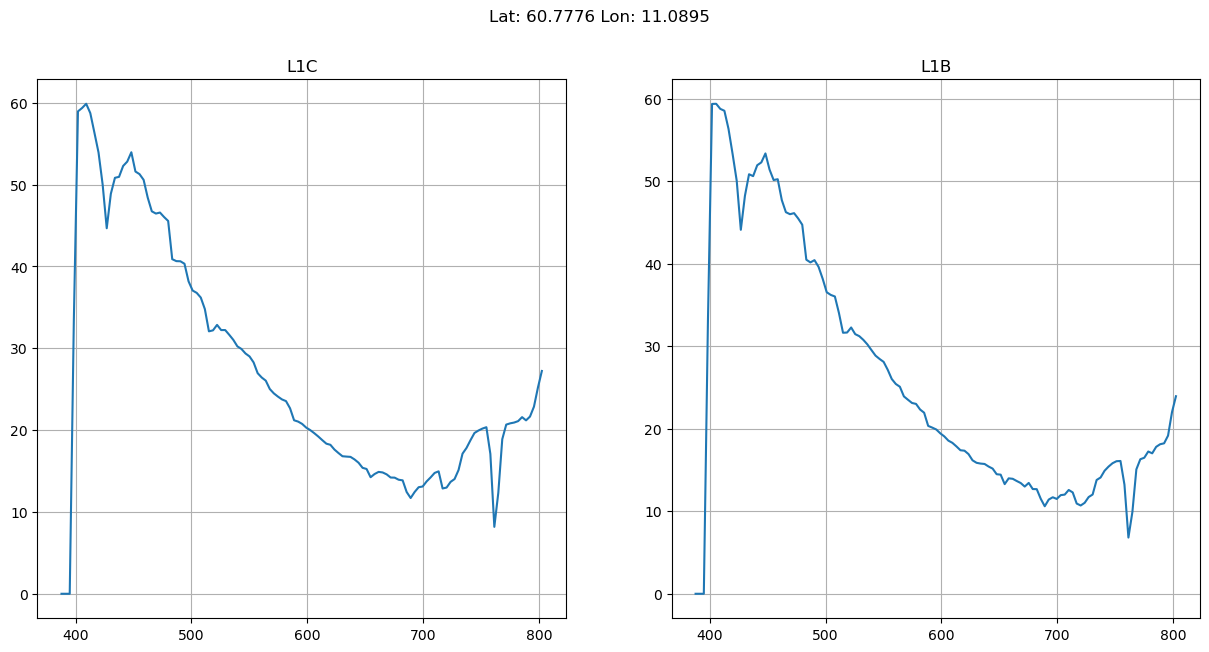

In [13]:
# Comparing Data Points
import numpy as np
import matplotlib.pyplot as plt

# Get min and max Values of Lat and Lon
print("Min Lat: ",np.nanmin(satobj.info["lat"]))
print("Max Lat: ",np.nanmax(satobj.info["lat"]))
print("Min Lon: ",np.nanmin(satobj.info["lon"]))
print("Max Lon: ",np.nanmax(satobj.info["lon"]))

print("------------------------ \n")

# Get Spectra L1C from a coordinate that is inside the values from above 
lat = 60.7776
lon = 11.0895
spectra_test1 = satobj.get_spectra(product="L1C",position_dict={"lat":lat,"lon":lon},postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv", plot=False) # Mjøsa
spectra_test1.head()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 7))
fig.suptitle('Lat: 60.7776 Lon: 11.0895')

ax1.plot(satobj.wavelengths,spectra_test1["radiance"])
ax1.set_title("L1C")
ax1.grid(True)


# Closest L1B Coordinate with Pithagoras --------------
current_lat = satobj.info["lat"]
current_lon = satobj.info["lon"]

coordinates = [c for c in zip(current_lat.flatten(),current_lon.flatten())]
xy = (lat,lon)

dist = lambda x, y: (x[0]-y[0])**2 + (x[1]-y[1])**2
closest_existing_coord = min(coordinates, key=lambda co: dist(co, xy))
found_lat = list(np.argwhere(current_lat==closest_existing_coord[0])[0])
found_lon = list(np.argwhere(current_lon==closest_existing_coord[1])[0])

found = None
if (found_lon==found_lat):
    found = found_lat

# Plot L1B Spectra
ax2.plot(satobj.wavelengths,satobj.l1b_cube[found[0],found[1],:])
ax2.set_title("L1B")
ax2.grid(True)
plt.show()
